# 1. Load Dataset

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


df = pd.read_csv('Iris.csv')
print(df.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


# 2. Descriptive Statistics

In [36]:
# Summary stats
print(df.describe())

# Class counts
print("\nClass Distribution:")
print(df['Species'].value_counts())



       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

Class Distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# 3. Exploratory Data Analysis (EDA)

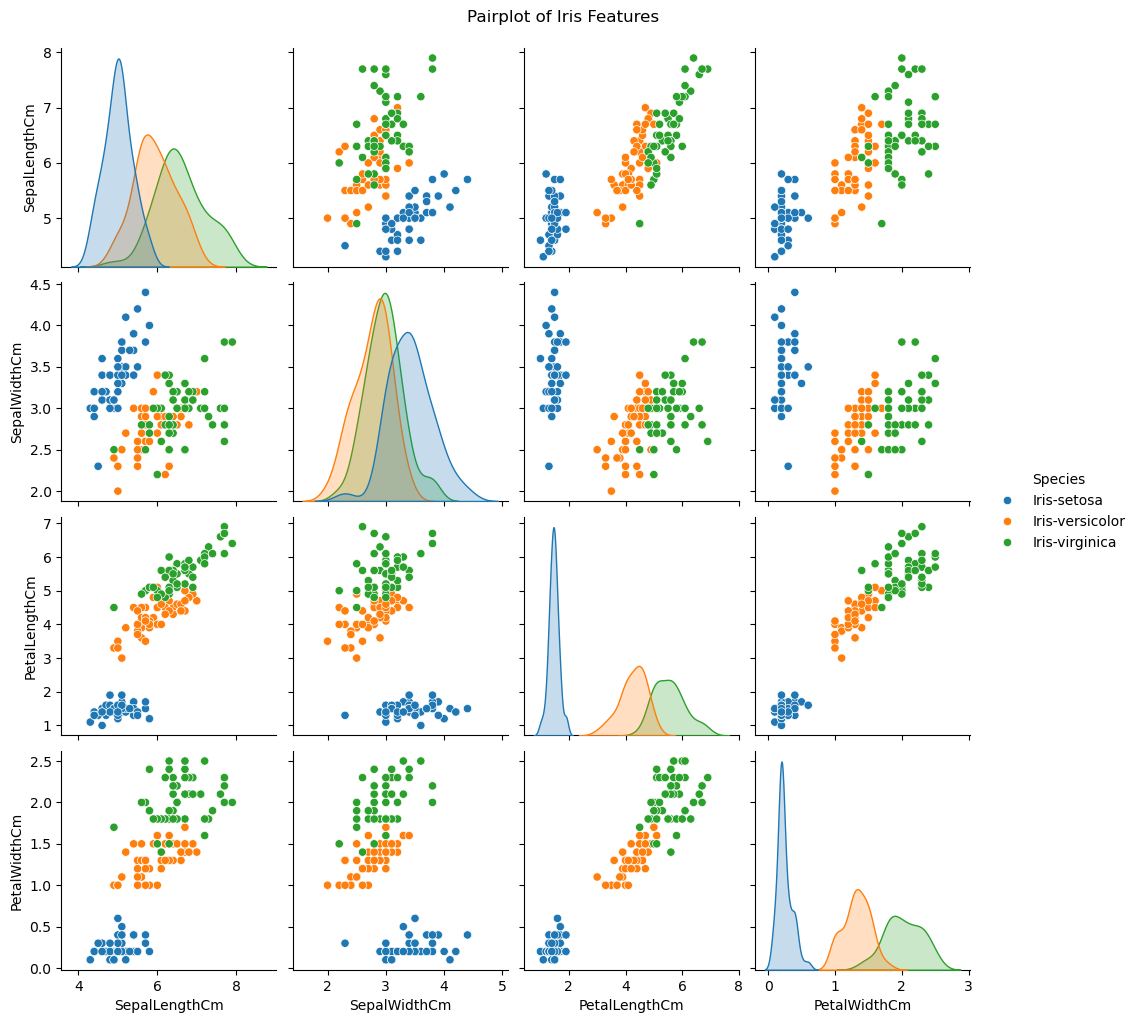

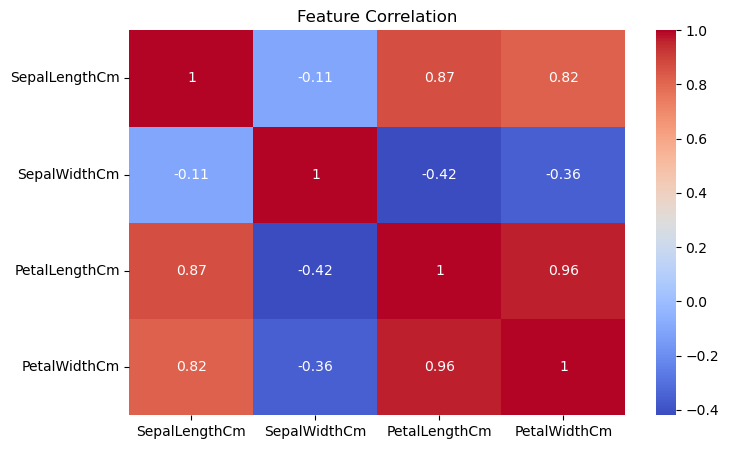

In [37]:

sns.pairplot(df, hue='Species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# Heatmap for feature correlation
plt.figure(figsize=(8, 5))
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


# 4. Data Preprocessing

In [38]:

# Features and label
X = df.drop('Species', axis=1)
y = df['Species']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 5. Model Training – K-Nearest Neighbors

In [39]:

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)



KNeighborsClassifier(n_neighbors=3)

# 📊 6. Model Evaluation

✅ Accuracy Score: 0.9666666666666667

📋 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



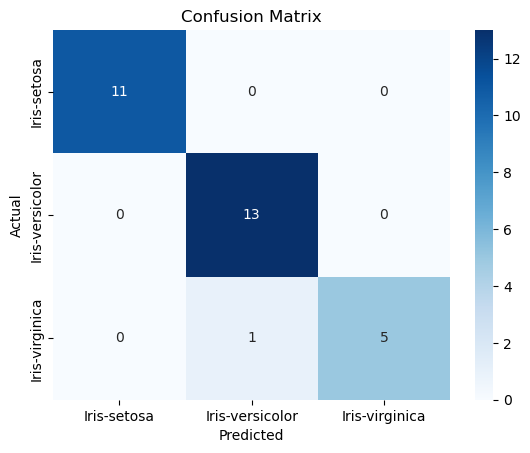

In [40]:

y_pred = model.predict(X_test_scaled)

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Predict New Flower Measurement

In [43]:
new_sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
new_sample_scaled = scaler.transform(new_sample)
print(model.predict(new_sample_scaled)[0])


Iris-setosa


# Conclusion

# ***This project demonstrates that the K-Nearest Neighbors (KNN) algorithm can effectively classify iris flowers with high accuracy. Petal length and width are key distinguishing features among species. The Iris dataset is simple yet powerful for beginners to practice exploratory data analysis, visualization, and model building.***